# Sales Analysis
## Importing required libraries

In [3]:
import pandas as pd
import json
import requests
import base64
import urllib.parse
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import geoplot as gplt
from pyproj import CRS
from shapely.geometry import Point
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter

In [4]:
#Loading all required dataframes from the csv files. You will need to download the files to your computer before running this code.
df_barca = pd.read_csv('df_idealista_barca.csv')
df_madrid = pd.read_csv('df_idealista_madrid.csv')
df_madrid2 = pd.read_csv('df_idealista_madrid2.csv')
df_valencia = pd.read_csv('df_idealista_valencia.csv')
df_sevilla = pd.read_csv('df_idealista_sevilla.csv')
df_malaga = pd.read_csv('df_idealista_malaga.csv')
df_bilbao = pd.read_csv('df_idealista_bilbao.csv')
df_palma = pd.read_csv('df_idealista_palma.csv')
df_laspalmas = pd.read_csv('df_idealista_laspalmas.csv')
df_zaragoza = pd.read_csv('df_idealista_zaragoza.csv')
df_granada = pd.read_csv('df_idealista_granada.csv')

In [5]:
df_madrid_all = pd.concat([df_madrid, df_madrid2], ignore_index=True)

Previewing the dataframe and the columns

In [6]:
df_madrid_all

,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,exterior,rooms,...,detailedType.typology,detailedType.subTypology,suggestedTexts.subtitle,suggestedTexts.title,floor,neighborhood,hasLift,parkingSpace.parkingSpacePrice,newDevelopmentFinished,highlight.groupDescription
0,463175,https://img3.idealista.com/blur/WEB_LISTING/0/...,MOV00825,43,3400000.0,chalet,sale,995.0,False,8,...,chalet,independantHouse,"La Moraleja urbanización, La Moraleja",Casa independiente,NaN,NaN,NaN,NaN,NaN,NaN
1,95331129,https://img3.idealista.com/blur/WEB_LISTING/0/...,13746,51,2000000.0,chalet,sale,441.0,False,5,...,chalet,semidetachedHouse,"Encinar de los Reyes, La Moraleja",Chalet pareado en Julio Caro Baroja,NaN,NaN,NaN,NaN,NaN,NaN
2,100527915,https://img3.idealista.com/blur/WEB_LISTING/0/...,JM183053,38,475000.0,flat,sale,125.0,True,3,...,flat,NaN,"Las Tablas, Madrid",Piso en Calle Castillo de Candanchú,5,Las Tablas,True,NaN,NaN,NaN
3,27686133,https://img3.idealista.com/blur/WEB_LISTING/0/...,XV 5858,49,1480000.0,chalet,sale,180.0,False,3,...,chalet,semidetachedHouse,"Encinar de los Reyes, La Moraleja",Chalet pareado en Paseo de los Parques,NaN,NaN,NaN,NaN,NaN,NaN
4,100811612,https://img3.idealista.com/blur/WEB_LISTING/0/...,XV 2797,53,3600000.0,chalet,sale,600.0,False,6,...,chalet,independantHouse,"La Moraleja urbanización, La Moraleja",Casa independiente en Hoyarrasa,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,101336238,https://img3.idealista.com/blur/WEB_LISTING/0/...,CL-VCAMPT7,24,180000.0,flat,sale,110.0,True,3,...,flat,NaN,"12 de Octubre-Orcasur, Madrid",Flat in Calle Campotéjar,8,12 de Octubre-Orcasur,True,NaN,NaN,NaN
3046,101337983,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,24,125000.0,flat,sale,70.0,True,3,...,flat,NaN,"Juan de la Cierva, Getafe",Flat in Avenida de los Ángeles,2,NaN,False,NaN,NaN,NaN
3047,101068284,https://img3.idealista.com/blur/WEB_LISTING/0/...,MV4762I,76,4750000.0,flat,sale,487.0,True,4,...,flat,NaN,"Recoletos, Madrid",Flat,5,Recoletos,True,NaN,NaN,Featured
3048,97499694,https://img3.idealista.com/blur/WEB_LISTING/0/...,Palomeras,22,150500.0,flat,sale,107.0,True,2,...,flat,NaN,"Palomeras sureste, Madrid",Flat,1,Palomeras sureste,True,NaN,NaN,NaN


In [27]:
#getting summary data for a dataframe
df_madrid_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   propertyCode                                3050 non-null   int64  
 1   thumbnail                                   3050 non-null   object 
 2   externalReference                           2728 non-null   object 
 3   numPhotos                                   3050 non-null   int64  
 4   price                                       3050 non-null   float64
 5   propertyType                                3050 non-null   object 
 6   operation                                   3050 non-null   object 
 7   size                                        3050 non-null   float64
 8   exterior                                    3050 non-null   bool   
 9   rooms                                       3050 non-null   int64  
 10  bathrooms   

In [7]:
df_barca.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'labels', 'topNewDevelopment',
       'superTopHighlight', 'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title',
       'detailedType.subTypology', 'parkingSpace.parkingSpacePrice',
       'newDevelopmentFinished'],
      dtype='object')

Here we clean the data by removing columns that we will not use for our analysis

In [74]:
#creating a function for the purpose of keeping columns that are relevant for the analysis
def keep_columns(df):
    columns_to_keep = ['propertyCode', 'thumbnail', 'price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district', 'country',
    'latitude', 'longitude', 'showAddress', 'url', 'distance', 'description', 'priceByArea' ]
    return df[columns_to_keep]


In [75]:
# running the function for all dataframes
df_barca_clean = keep_columns(df_barca)
df_madrid_clean = keep_columns(df_madrid_all)
df_valencia_clean = keep_columns(df_valencia)
df_sevilla_clean = keep_columns(df_sevilla)
df_malaga_clean = keep_columns(df_malaga)
df_bilbao_clean = keep_columns(df_bilbao)
df_palma_clean = keep_columns(df_palma)
df_laspalmas_clean = keep_columns(df_laspalmas)
df_zaragoza_clean = keep_columns(df_zaragoza)
df_granada_clean = keep_columns(df_granada)


In [76]:
# function to check for duplicates
def remove_duplicates(df):
    duplicates = df.duplicated()
    # drop duplicates
    df_clean = df.drop_duplicates()
    return df_clean

In [77]:
# running the function for all dataframes
df_barca_clean = remove_duplicates(df_barca_clean)
df_madrid_clean = remove_duplicates(df_madrid_clean)
df_valencia_clean = remove_duplicates(df_valencia_clean)
df_sevilla_clean = remove_duplicates(df_sevilla_clean)
df_malaga_clean = remove_duplicates(df_malaga_clean)
df_bilbao_clean = remove_duplicates(df_bilbao_clean)
df_palma_clean = remove_duplicates(df_palma_clean)
df_laspalmas_clean = remove_duplicates(df_laspalmas_clean)
df_zaragoza_clean = remove_duplicates(df_zaragoza_clean)
df_granada_clean = remove_duplicates(df_granada_clean)


In [78]:
#viewing a cleaned dataframe to make sure everything works
df_madrid_clean

,propertyCode,thumbnail,price,propertyType,size,exterior,rooms,bathrooms,address,province,municipality,district,country,latitude,longitude,showAddress,url,distance,description,priceByArea
0,463175,https://img3.idealista.com/blur/WEB_LISTING/0/...,3400000.00,chalet,995.00,False,8,7,La Moraleja urbanización,Madrid,La Moraleja,La Moraleja urbanización,es,40.51,-3.63,False,https://www.idealista.com/inmueble/463175/,11898,DESALAS. Ref: MOV00825. En la EXCLUSIVA zona s...,3417.00
1,95331129,https://img3.idealista.com/blur/WEB_LISTING/0/...,2000000.00,chalet,441.00,False,5,5,Julio Caro Baroja,Madrid,La Moraleja,Encinar de los Reyes,es,40.51,-3.65,False,https://www.idealista.com/inmueble/95331129/,11214,Suma Moraleja le ofrece este espléndido y lumi...,4535.00
2,100527915,https://img3.idealista.com/blur/WEB_LISTING/0/...,475000.00,flat,125.00,True,3,2,Calle Castillo de Candanchú,Madrid,Madrid,Fuencarral,es,40.50,-3.68,False,https://www.idealista.com/inmueble/100527915/,9997,GILMAR MORALEJA ofrece estupendo PISO EN LAS T...,3800.00
3,27686133,https://img3.idealista.com/blur/WEB_LISTING/0/...,1480000.00,chalet,180.00,False,3,2,Paseo de los Parques,Madrid,La Moraleja,Encinar de los Reyes,es,40.51,-3.64,False,https://www.idealista.com/inmueble/27686133/,11752,REA Inmobiliaria ( ) presenta este pareado imp...,8222.00
4,100811612,https://img3.idealista.com/blur/WEB_LISTING/0/...,3600000.00,chalet,600.00,False,6,6,HOYARRASA,Madrid,La Moraleja,La Moraleja urbanización,es,40.53,-3.62,False,https://www.idealista.com/inmueble/100811612/,14166,REA Inmobiliaria (916508937) ofrece este fantá...,6000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,101336238,https://img3.idealista.com/blur/WEB_LISTING/0/...,180000.00,flat,110.00,True,3,2,Calle Campotéjar,Madrid,Madrid,Usera,es,40.37,-3.70,False,https://www.idealista.com/inmueble/101336238/,5232,"This flat is at Calle Campotéjar, 28041, Madri...",1636.00
3046,101337983,https://img3.idealista.com/blur/WEB_LISTING/0/...,125000.00,flat,70.00,True,3,1,Avenida de los Ángeles,Madrid,Getafe,Juan de la Cierva,es,40.31,-3.71,False,https://www.idealista.com/inmueble/101337983/,12160,Madridsur Gestión Inmobiliaria sells an apartm...,1786.00
3047,101068284,https://img3.idealista.com/blur/WEB_LISTING/0/...,4750000.00,flat,487.00,True,4,5,subdistrict Recoletos,Madrid,Madrid,Barrio de Salamanca,es,40.43,-3.68,False,https://www.idealista.com/inmueble/101068284/,2182,PROMORA MADRID is selling this magnificent fla...,9754.00
3048,97499694,https://img3.idealista.com/blur/WEB_LISTING/0/...,150500.00,flat,107.00,True,2,1,subdistrict Palomeras sureste,Madrid,Madrid,Puente de Vallecas,es,40.39,-3.64,False,https://www.idealista.com/inmueble/97499694/,6280,MADRID VALLECAS real estate agency | PALOMERAS...,1407.00


## Analysis

In this section we run analyses on our sales data

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/madrid1.png


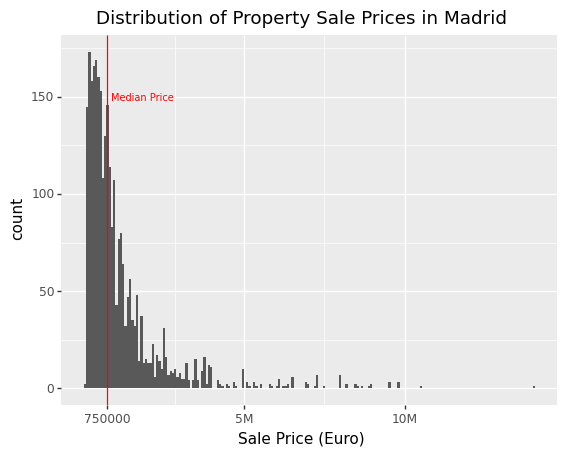

<ggplot: (8777285674680)>

In [15]:
# creating diagrams for the distribution of property sales prices in each city, and highlighting each city's median price
median_price = np.median(df_madrid_clean['price'])
median_price = int(median_price)

madrid_price_graph = (ggplot(df_madrid_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth=70000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 5000000, 10000000], labels=[median_price, '5M', '10M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Madrid') 
  + annotate("text", x=median_price+1100000, y=150, label="Median Price", color="red", size=7, angle=0))

g = (madrid_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/madrid1.png', dpi=300)

madrid_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/barca1.png


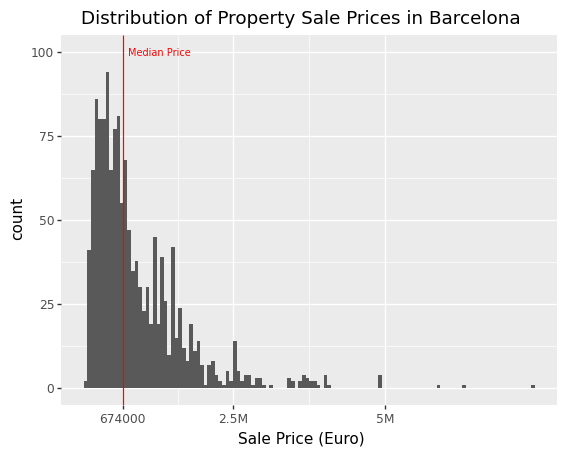

<ggplot: (8777285523929)>

In [16]:
median_price = np.median(df_barca_clean['price'])
median_price = int(median_price)

barca_price_graph = (ggplot(df_barca_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 60000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2500000, 5000000], labels=[median_price, '2.5M', '5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Barcelona') 
  + annotate("text", x = median_price + 600000, y=100, label="Median Price", color="red", size=7, angle=0))

g = (barca_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/barca1.png', dpi=300)


barca_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/valencia1.png


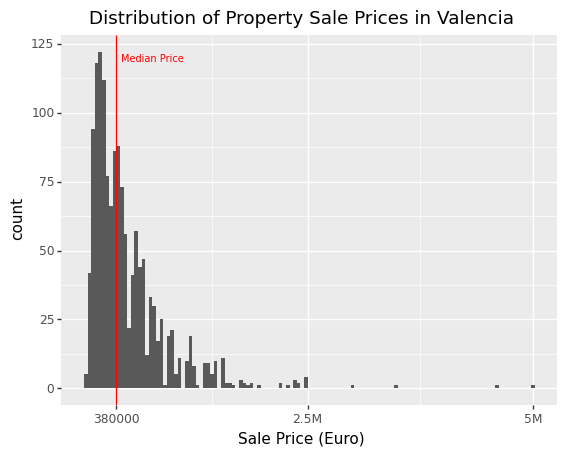

<ggplot: (8777285489866)>

In [17]:
median_price = np.median(df_valencia_clean['price'])
median_price = int(median_price)

valencia_price_graph = (ggplot(df_valencia_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 40000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2500000, 5000000], labels=[median_price, '2.5M', '5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Valencia') 
  + annotate("text", x = median_price + 400000, y=120, label="Median Price", color="red", size=7, angle=0))

g = (valencia_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/valencia1.png', dpi=300)


valencia_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/sevilla1.png


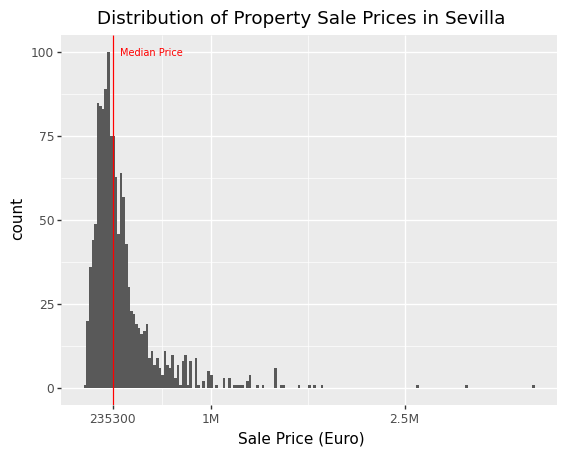

<ggplot: (8777285387002)>

In [18]:
median_price = np.median(df_sevilla_clean['price'])
median_price = int(median_price)

sevilla_price_graph = (ggplot(df_sevilla_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 20000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1000000, 2500000], labels=[median_price, '1M', '2.5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Sevilla') 
  + annotate("text", x = median_price + 300000, y=100, label="Median Price", color="red", size=7, angle=0))

g = (sevilla_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/sevilla1.png', dpi=300)


sevilla_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/malaga1.png


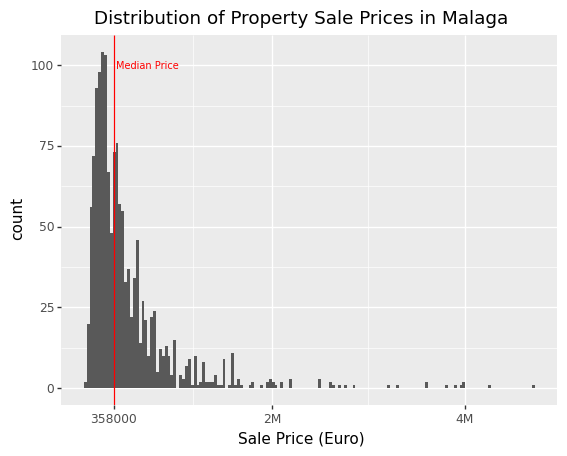

<ggplot: (8777285488993)>

In [19]:
median_price = np.median(df_malaga_clean['price'])
median_price = int(median_price)

malaga_price_graph = (ggplot(df_malaga_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2000000, 4000000], labels=[median_price, '2M', '4M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Malaga') 
  + annotate("text", x = median_price + 350000, y=100, label="Median Price", color="red", size=7, angle=0))

g = (malaga_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/malaga1.png', dpi=300)

malaga_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/bilbao1.png


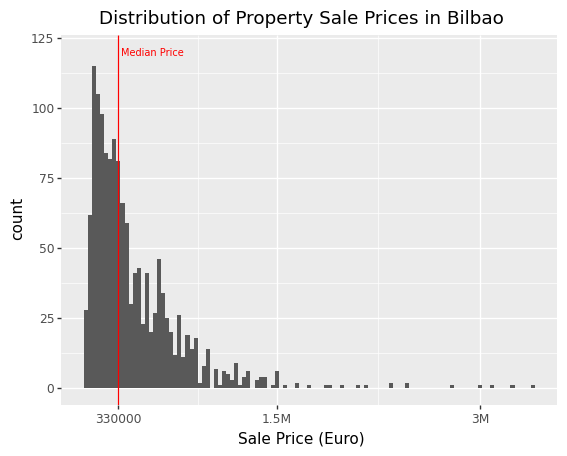

<ggplot: (8777285376732)>

In [20]:
median_price = np.median(df_bilbao_clean['price'])
median_price = int(median_price)

bilbao_price_graph = (ggplot(df_bilbao_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Bilbao') 
  + annotate("text", x = median_price + 250000, y=120, label="Median Price", color="red", size=7, angle=0))

g = (bilbao_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/bilbao1.png', dpi=300)


bilbao_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/laspalmas1.png


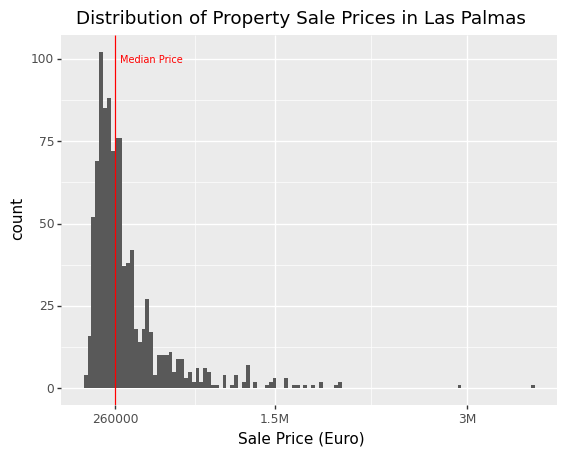

<ggplot: (8777285225620)>

In [21]:
median_price = np.median(df_laspalmas_clean['price'])
median_price = int(median_price)

laspalmas_price_graph = (ggplot(df_laspalmas_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Las Palmas') 
  + annotate("text", x = median_price + 280000, y=100, label="Median Price", color="red", size=7, angle=0))

g = (laspalmas_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/laspalmas1.png', dpi=300)


laspalmas_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/palma1.png


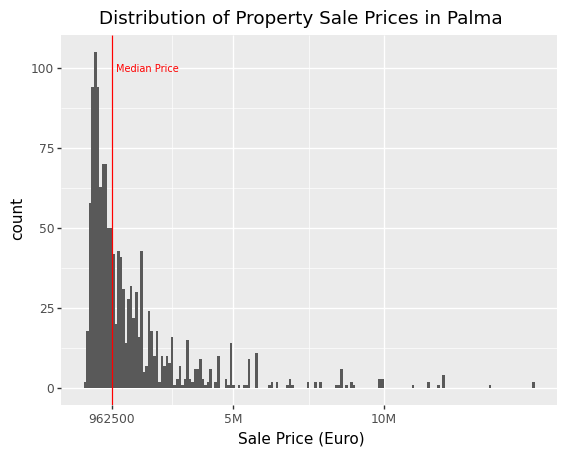

<ggplot: (8777285133391)>

In [22]:
median_price = np.median(df_palma_clean['price'])
median_price = int(median_price)

palma_price_graph = (ggplot(df_palma_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 85000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 5000000, 10000000], labels=[median_price, '5M', '10M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Palma') 
  + annotate("text", x = median_price + 1200000, y=100, label="Median Price", color="red", size=7, angle=0))

g = (palma_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/palma1.png', dpi=300)


palma_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/zaragoza1.png


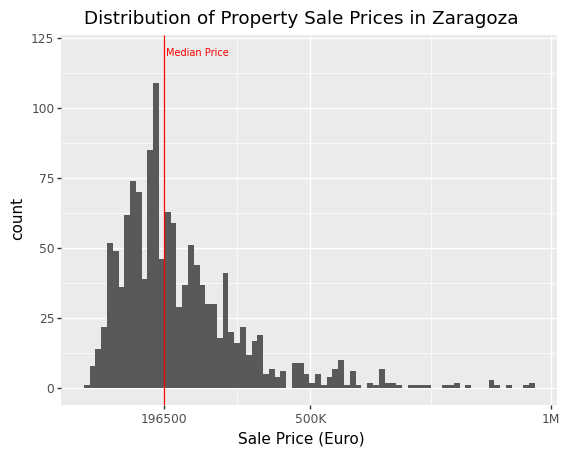

<ggplot: (8777285211302)>

In [23]:
median_price = np.median(df_zaragoza_clean['price'])
median_price = int(median_price)

zaragoza_price_graph = (ggplot(df_zaragoza_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 12000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 500000, 1000000], labels=[median_price, '500K', '1M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Zaragoza') 
  + annotate("text", x = median_price + 70000, y=120, label="Median Price", color="red", size=7, angle=0))

g = (zaragoza_price_graph)
#change this value to your desired folder
g.save('/home/winterolller/DS105L/zaragoza1.png', dpi=300)

zaragoza_price_graph

/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/winterolller/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/winterolller/DS105L/granada1.png


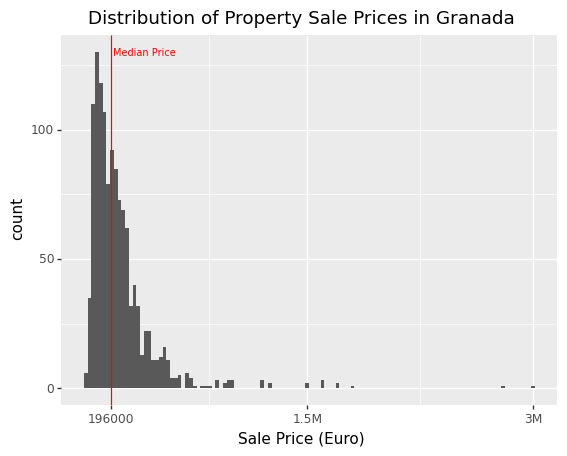

<ggplot: (8777285489719)>

In [24]:
median_price = np.median(df_granada_clean['price'])
median_price = int(median_price)

granada_price_graph = (ggplot(df_granada_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 25000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Granada') 
  + annotate("text", x = median_price + 220000, y= 130, label="Median Price", color="red", size=7, angle=0))

g = (granada_price_graph)
#change the file save destination to your desired folder
g.save('/home/winterolller/DS105L/granada1.png', dpi=300)


granada_price_graph

Boxplot Analysis

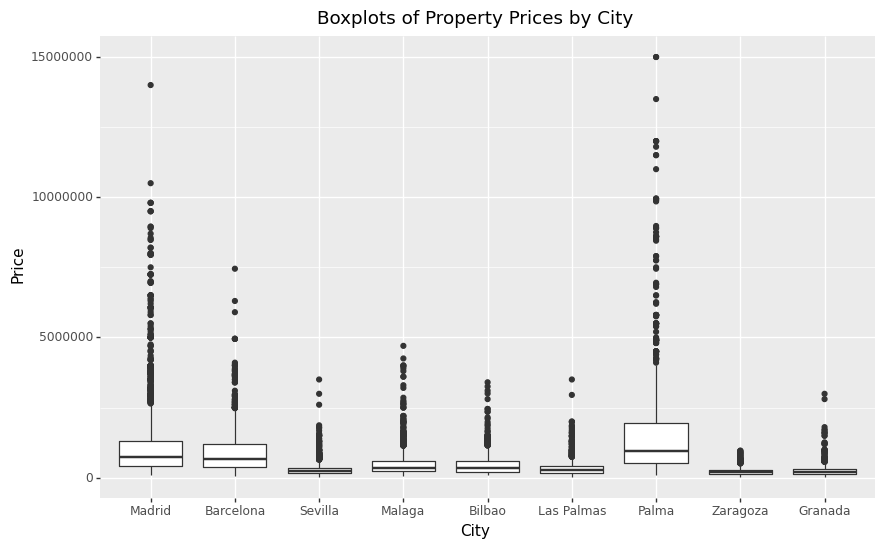

<ggplot: (8775194177958)>

In [178]:
# create list of dataframes
dfs = [df_madrid_clean, df_barca_clean, df_sevilla_clean, df_malaga_clean, df_bilbao_clean, df_laspalmas_clean, df_palma_clean, df_zaragoza_clean, df_granada_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Madrid', 'Barcelona', 'Sevilla', 'Malaga', 'Bilbao', 'Las Palmas', 'Palma', 'Zaragoza', 'Granada']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# convert the 'city' column to a categorical data type with the specified order of categories
df['city'] = pd.Categorical(df['city'], categories=city_names, ordered=True)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)


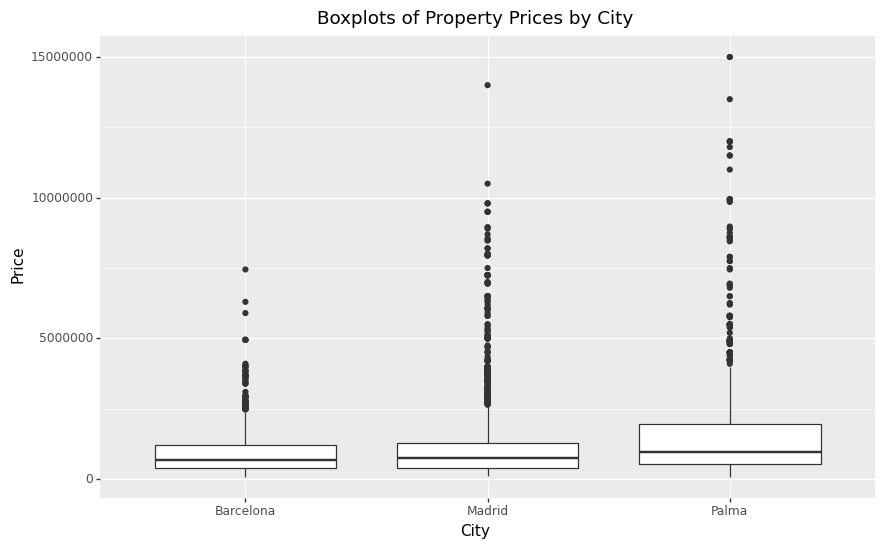

<ggplot: (8775193322448)>

In [179]:
# create list of dataframes
dfs = [df_madrid_clean, df_barca_clean, df_palma_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Madrid', 'Barcelona', 'Palma']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)

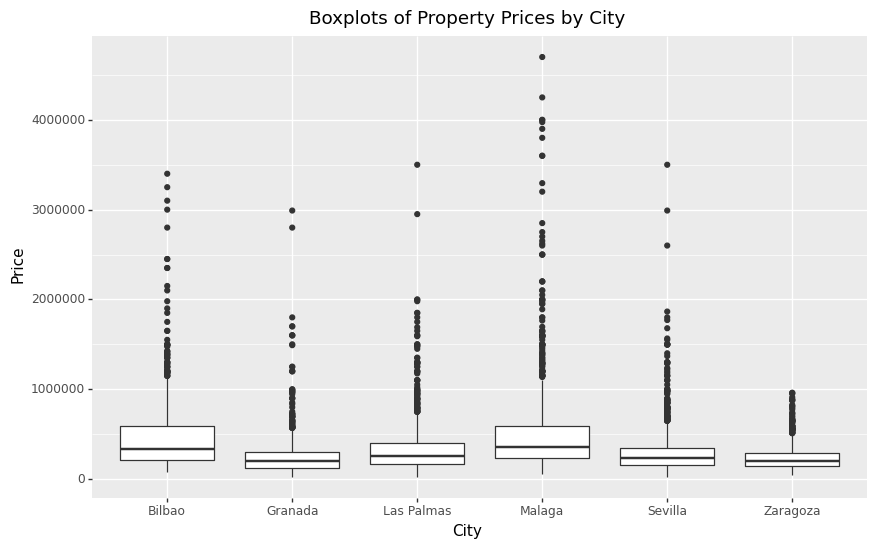

<ggplot: (8775194147133)>

In [180]:
# create list of dataframes
dfs = [df_sevilla_clean, df_malaga_clean, df_bilbao_clean, df_laspalmas_clean, df_zaragoza_clean, df_granada_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Sevilla', 'Malaga', 'Bilbao', 'Las Palmas', 'Zaragoza', 'Granada']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)

### MAPPING ###

In the following section we analyse property prices in Madrid and Barcelona by district, utilising Geopandas to generate property price heat maps

In [44]:
#Loading in the map shapefiles. The shapefiles can be obtained from the official municipaltiy websites of Madrid and Barcelona respectively.
madrid_map = gpd.read_file('Distritos_20210712.shp', crs='epsg:25830')
barca_map = gpd.read_file('shapefile_distrito_barcelona.shp', crs='epsg:25830')

In [26]:
#ensuring that the map types are geodataframes
type(madrid_map)

geopandas.geodataframe.GeoDataFrame

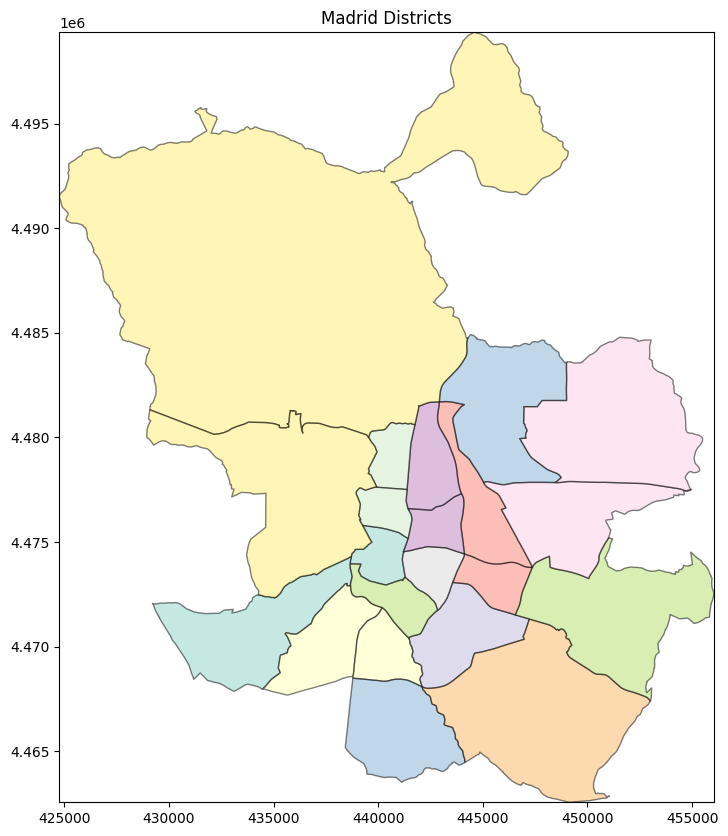

In [28]:
# Test code to recolour Madrid polygons to ensure they can be colour coded
fig0, ax = plt.subplots(figsize=(10, 10))

# Use the 'geometry' column to color the polygons
madrid_map.plot(ax=ax, column='geometry', cmap='Set3', alpha=0.5, edgecolor='k')

# Set the axis limits and title
ax.set_xlim(madrid_map.total_bounds[0], madrid_map.total_bounds[2])
ax.set_ylim(madrid_map.total_bounds[1], madrid_map.total_bounds[3])
ax.set_title('Madrid Districts')

fig0

In [29]:
# Convert the Pandas DataFrame to a GeoDataFrame using the coordinates as the geometry. Only run this code once.
gdf_prices = gpd.GeoDataFrame(df_madrid_clean, geometry=gpd.points_from_xy(df_madrid_clean.longitude, df_madrid_clean.latitude))
gdf_geometry = gdf_prices['geometry']
gdf_geometry.crs = CRS.from_epsg(4326)
gdf_madrid_properties = gdf_geometry.to_frame()
gdf_madrid_properties

,geometry
0,POINT (-3.62846 40.50714)
1,POINT (-3.64623 40.50763)
2,POINT (-3.67889 40.50467)
3,POINT (-3.64487 40.51250)
4,POINT (-3.61978 40.52700)
...,...
3045,POINT (-3.70452 40.36972)
3046,POINT (-3.71480 40.30773)
3047,POINT (-3.68369 40.42908)
3048,POINT (-3.63917 40.38903)


In [45]:
# Set CRS to ETRS89
madrid_map.crs = CRS.from_epsg(25830)
# Transform to EPSG 4326
madrid_map = madrid_map.to_crs(epsg=4326)
# Check the result
print(madrid_map.crs)
print(gdf_madrid_properties.crs)

EPSG:4326
EPSG:4326


In [31]:
# Perform spatial join
gdf_madrid = gpd.sjoin(gdf_madrid_properties, madrid_map, op='intersects')
gdf_madrid


/home/winterolller/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [32]:
gdf_madrid

,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [33]:
gdf_madrid

,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [80]:
#Add the price column to gdf_madrid
gdf_madrid['price'] = df_madrid_clean['price']
gdf_madrid['district'] = df_madrid_clean['district']
gdf_madrid2 = gdf_madrid

# Add the 'pricebyarea' column to gdf_madrid2
gdf_madrid2['priceByArea'] = df_madrid_clean['priceByArea']

gdf_madrid2


,geometry,index_right,price,district,priceByArea
0,POINT (-3.62846 40.50714),7,3400000.00,La Moraleja urbanización,3417.00
1,POINT (-3.64623 40.50763),7,2000000.00,Encinar de los Reyes,4535.00
5,POINT (-3.64605 40.50731),7,2000000.00,Encinar de los Reyes,4535.00
17,POINT (-3.63636 40.50416),7,1680000.00,Encinar de los Reyes,5169.00
26,POINT (-3.61716 40.51029),7,7250000.00,La Moraleja urbanización,7796.00
...,...,...,...,...,...
2821,POINT (-3.66587 40.39181),4,212900.00,Puente de Vallecas,3226.00
2833,POINT (-3.65396 40.39265),4,140000.00,Puente de Vallecas,2593.00
2913,POINT (-3.66706 40.39522),4,130000.00,Puente de Vallecas,2063.00
2920,POINT (-3.66552 40.39794),4,128000.00,Puente de Vallecas,2327.00


In [81]:
unique_districts = gdf_madrid2['district'].unique()
print(unique_districts)


['La Moraleja urbanización' 'Encinar de los Reyes' 'Hortaleza'
 'Ciudad Lineal' 'San Blas' 'Fuencarral' 'Moncloa' 'Tetuán' 'Chamberí'
 'Centro' 'Barrio de Salamanca' 'Retiro' 'Chamartín' 'Arganzuela'
 'Carabanchel' 'Latina' 'Moratalaz' 'Zona Estación' 'Somosaguas' 'Usera'
 'Barajas' 'Campodón - Ventorro del Cano' 'Vicálvaro' 'Villaverde'
 'Villa de Vallecas' 'Puente de Vallecas']


In [82]:
# List of 21 districts in Madrid
madrid_districts = ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral-El Pardo', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas-Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']

# List of 25 districts obtained from the data
all_districts = gdf_madrid2['district'].unique()

# Find the impostor districts
impostor_districts = set(all_districts) - set(madrid_districts)

# Print the impostor districts
print(impostor_districts)


{'Somosaguas', 'San Blas', 'La Moraleja urbanización', 'Fuencarral', 'Encinar de los Reyes', 'Campodón - Ventorro del Cano', 'Zona Estación', 'Moncloa', 'Barrio de Salamanca'}


In [38]:
median_price_by_polygon = gdf_madrid2.groupby('index_right')['price'].median()
median_price_by_polygon

index_right
0      630000.0
1      180000.0
2      250000.0
3      219000.0
4      155000.0
5      415500.0
6      395000.0
7     1140000.0
8      172000.0
9      284000.0
10     399000.0
11     429900.0
12     335000.0
13     395000.0
14     650000.0
15    1100000.0
16    1112500.0
17     483000.0
18     850000.0
19     850000.0
20    1280000.0
Name: price, dtype: float64

In [39]:
pd.options.display.float_format = '{:.2f}'.format
median_price_by_polygon

index_right
0     630000.00
1     180000.00
2     250000.00
3     219000.00
4     155000.00
5     415500.00
6     395000.00
7    1140000.00
8     172000.00
9     284000.00
10    399000.00
11    429900.00
12    335000.00
13    395000.00
14    650000.00
15   1100000.00
16   1112500.00
17    483000.00
18    850000.00
19    850000.00
20   1280000.00
Name: price, dtype: float64

In [83]:
median_pricebyarea_by_polygon = gdf_madrid2.groupby('index_right')['priceByArea'].median()
median_pricebyarea_by_polygon

index_right
0    5408.00
1    2397.00
2    2918.00
3    2397.50
4    2460.00
5    2828.50
6    3990.00
7    4549.00
8    1959.00
9    2664.50
10   2735.00
11   4124.00
12   2931.00
13   3380.00
14   5000.00
15   7694.00
16   5843.00
17   4552.00
18   6021.50
19   3705.00
20   4283.00
Name: priceByArea, dtype: float64

In [84]:
madrid_map['median_price_by_polygon'] = median_price_by_polygon
madrid_map['median_pricebyarea_by_polygon'] = median_pricebyarea_by_polygon
madrid_map


,geometry,median_price_by_polygon,median_pricebyarea_by_polygon
0,"POLYGON ((-3.69316 40.40735, -3.69320 40.40720...",630000.00,5408.00
1,"POLYGON ((-3.72261 40.41138, -3.72182 40.40851...",180000.00,2397.00
2,"POLYGON ((-3.71932 40.39984, -3.71901 40.39983...",250000.00,2918.00
3,"POLYGON ((-3.68315 40.36474, -3.68314 40.36449...",219000.00,2397.50
4,"POLYGON ((-3.67807 40.36069, -3.67875 40.36068...",155000.00,2460.00
5,"POLYGON ((-3.64289 40.41451, -3.64095 40.41442...",415500.00,2828.50
6,"POLYGON ((-3.62189 40.41553, -3.62162 40.41516...",395000.00,3990.00
7,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112...",1140000.00,4549.00
8,"POLYGON ((-3.70366 40.36356, -3.70324 40.36356...",172000.00,1959.00
9,"POLYGON ((-3.60705 40.38666, -3.60648 40.38625...",284000.00,2664.50


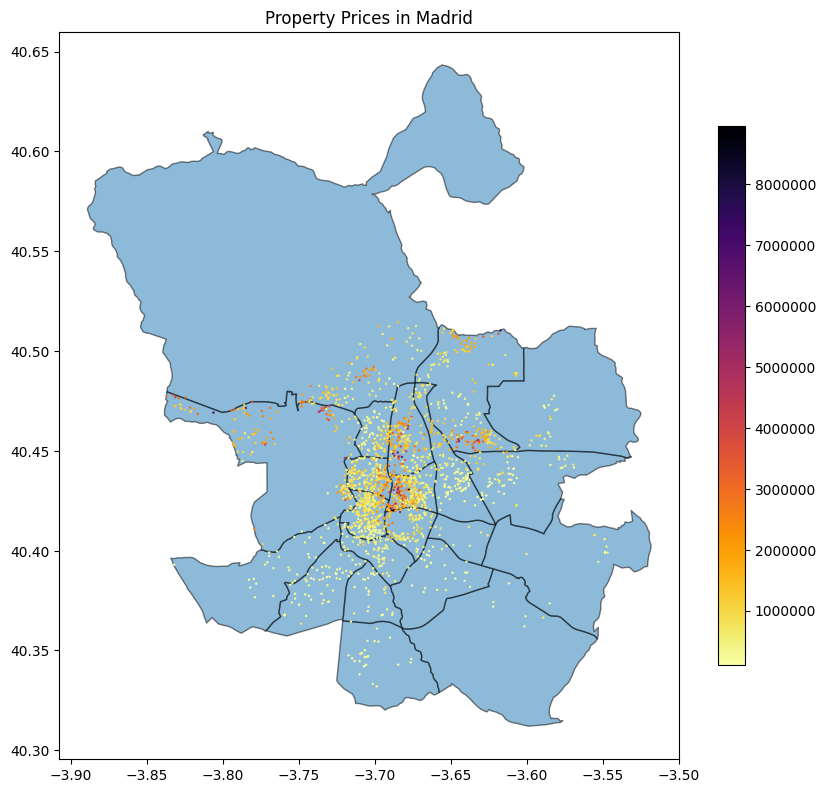

In [71]:
# Map of Madrid with property locations and prices overlaid
fig1, ax = plt.subplots(figsize=(10, 10))
madrid_map.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_madrid2.plot(ax=ax, column='price', cmap='inferno_r', markersize=0.5, legend=False)
ax.set_title('Property Prices in Madrid')

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='inferno_r', norm=plt.Normalize(vmin=gdf_madrid2['price'].min(), vmax=gdf_madrid2['price'].max()))
sm._A = []

# Add the colorbar with non-scientific notation
cbar = fig1.colorbar(sm, ax=ax, shrink=0.7)
# Set the tick labels on the colorbar to non-scientific notation
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))


fig1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


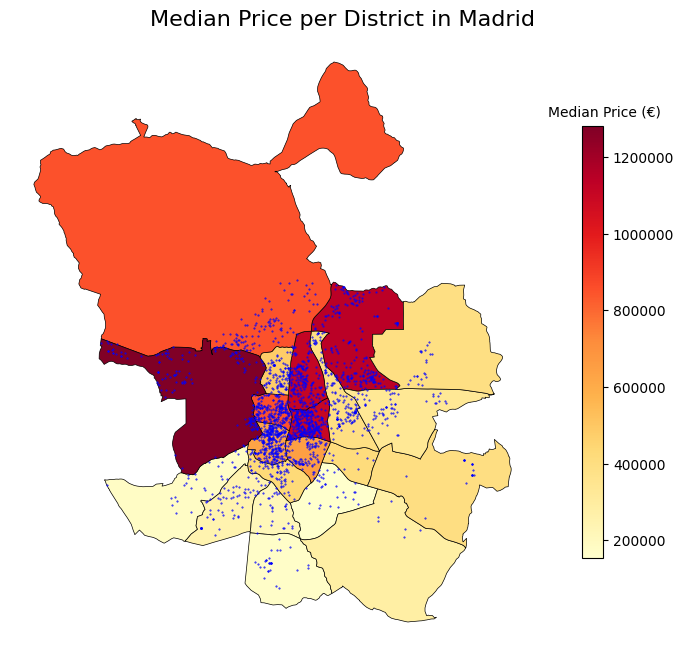

In [113]:
# Heatmap of districts in Madrid by property price
fig1a, ax = plt.subplots(figsize=(12,8))

# Plot the heatmap
heatmap = madrid_map.plot(column='median_price_by_polygon', cmap='YlOrRd', ax=ax, alpha=1, edgecolor='k', linewidth=0.5, legend=False)

# Add a title
ax.set_title('Median Price per District in Madrid', fontsize=16, ha = 'right', x=1)

# Add the property dots to the map
gdf_madrid.plot(ax=ax, marker='o', color='blue', markersize=0.2)

# Remove the latitude and longitude lines
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=madrid_map['median_price_by_polygon'].min(), vmax=madrid_map['median_price_by_polygon'].max()))
sm._A = []

# Add the colorbar with non-scientific notation
cbar = fig1a.colorbar(sm, ax=ax, shrink=0.7)
# Set the tick labels on the colorbar to non-scientific notation
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))

# Add a legend for the heatmap colors indicating values in euros
legend_label = 'Median Price (€)'
ax.legend(title=legend_label, loc='lower left', bbox_to_anchor=(1, 0.83), frameon=False)

# Save the figure
fig1a.savefig('madrid_heatmap1.png', dpi=300, bbox_inches='tight')
fig1a


#INCLUDING POPULATION DATA MIGHT BE USEFUL, GDP DATA?
#REMOVE LATLONG BOXES
#Do a spatial correlation with rental
#use Altair, Plotly...
#find more Madrid shapefile/zoning data (from municipalities)
#price per area rather than total price
#CHANGE GRAPH TO MEDIAN NOT MEAN PER DISTRICT
#compare with TYPES of properties. STORYTELLING THE MOST IMPORTANT. JUSTIFY WHY EACH PLOTS IS THERE
#make sure images load and are not stock images


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


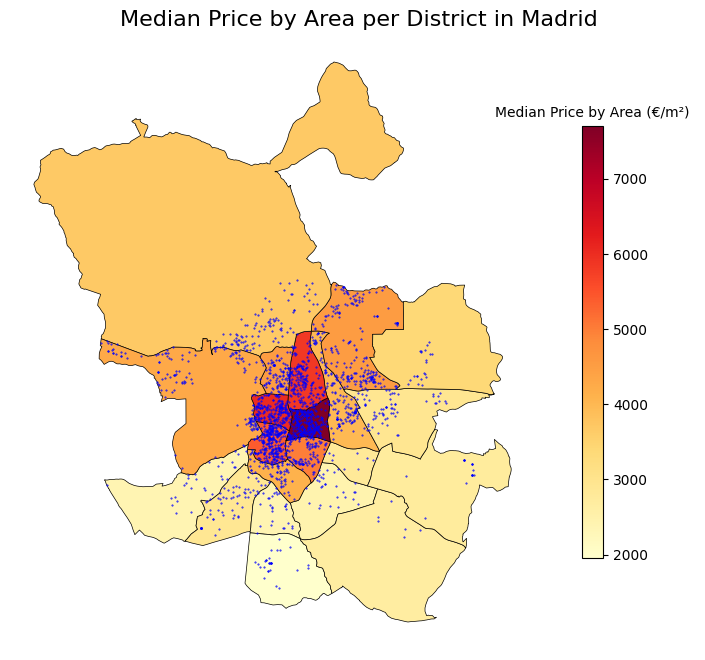

In [108]:
# Heatmap of districts in Madrid by property price
fig1b, ax = plt.subplots(figsize=(12,8))

# Plot the heatmap
heatmap = madrid_map.plot(column='median_pricebyarea_by_polygon', cmap='YlOrRd', ax=ax, alpha=1, edgecolor='k', linewidth=0.5, legend=False)

# Add a title
ax.set_title('Median Price by Area per District in Madrid', fontsize=16, ha = 'right', x=1.12)

# Add the property dots to the map
gdf_madrid.plot(ax=ax, marker='o', color='blue', markersize=0.2)

# Remove the latitude and longitude lines
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=madrid_map['median_pricebyarea_by_polygon'].min(), vmax=madrid_map['median_pricebyarea_by_polygon'].max()))
sm._A = []


# Add the colorbar with non-scientific notation
cbar = fig1b.colorbar(sm, ax=ax, shrink=0.7)
# Set the tick labels on the colorbar to non-scientific notation
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))

# Add a legend for the heatmap colors indicating values in euros
legend_label = 'Median Price by Area (€/m²)'
ax.legend(title=legend_label, loc='lower left', bbox_to_anchor=(0.9, 0.83), frameon=False)

# Save the figure
#fig1b.savefig('madrid_heatmap2.png', dpi=300, bbox_inches='tight')
fig1b


#INCLUDING POPULATION DATA MIGHT BE USEFUL, GDP DATA?
#REMOVE LATLONG BOXES
#Do a spatial correlation with rental
#use Altair, Plotly...
#find more Madrid shapefile/zoning data (from municipalities)
#price per area rather than total price
#CHANGE GRAPH TO MEDIAN NOT MEAN PER DISTRICT
#compare with TYPES of properties. STORYTELLING THE MOST IMPORTANT. JUSTIFY WHY EACH PLOTS IS THERE
#make sure images load and are not stock images


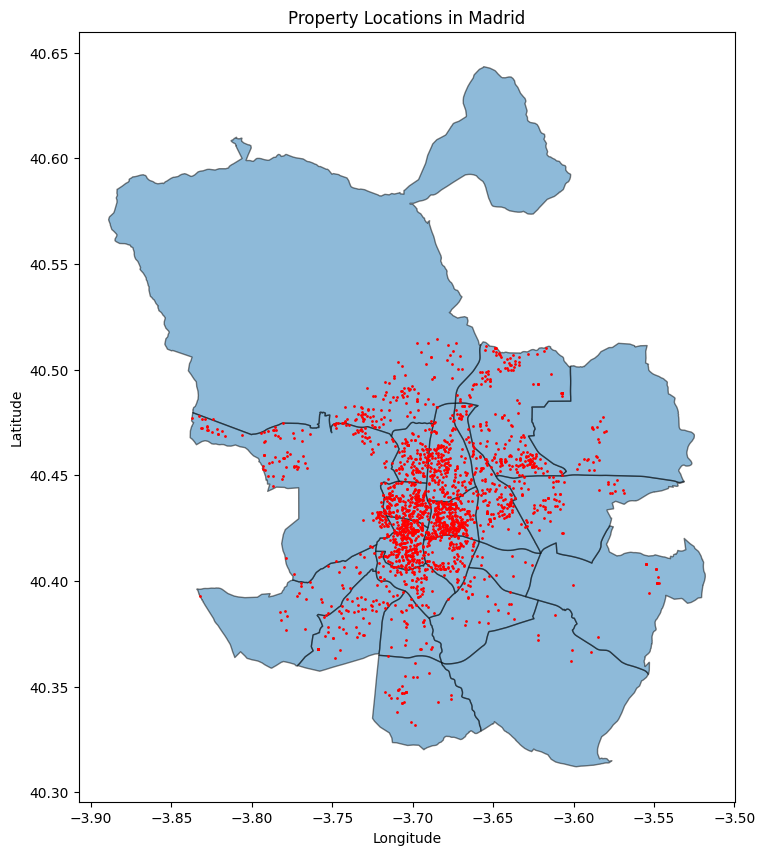

In [201]:
# USE THIS CODE to display only properties within the city of Madrid boundaries, and the above for those outside the official city boundaries as well. So gdf_madrid for this, and gdf_madrid_properties for the above.
fig2a, ax = plt.subplots(figsize=(10,10))
madrid_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_madrid.plot(ax=ax, color='red', markersize=1, )
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Madrid')
fig2a

/home/winterolller/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


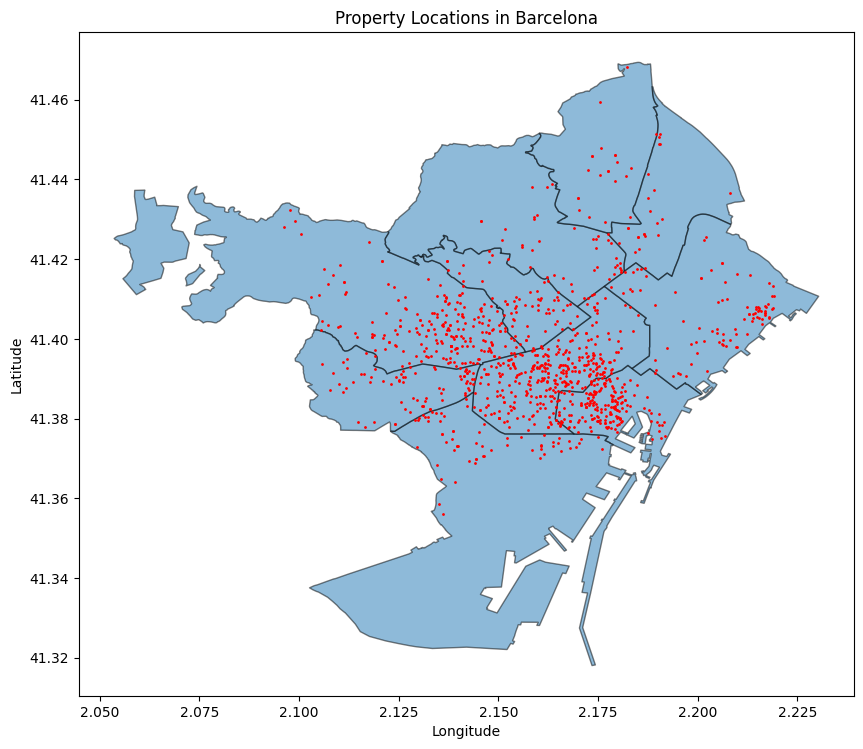

In [51]:
gdf_locs = gpd.GeoDataFrame(df_barca_clean, geometry=gpd.points_from_xy(df_barca_clean.longitude, df_barca_clean.latitude))
gdf_geometry = gdf_locs['geometry']
gdf_geometry.crs = CRS.from_epsg(25830)
gdf_city_properties = gdf_geometry.to_frame()
barca_map.crs = CRS.from_epsg(25830)
    # Transform to EPSG 25830

city_map = barca_map.to_crs(epsg=25830)
gdf_joined_map = gpd.sjoin(gdf_city_properties, city_map, op='intersects')
fig3, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_joined_map.plot(ax=ax, color='red', markersize=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Barcelona')

fig3


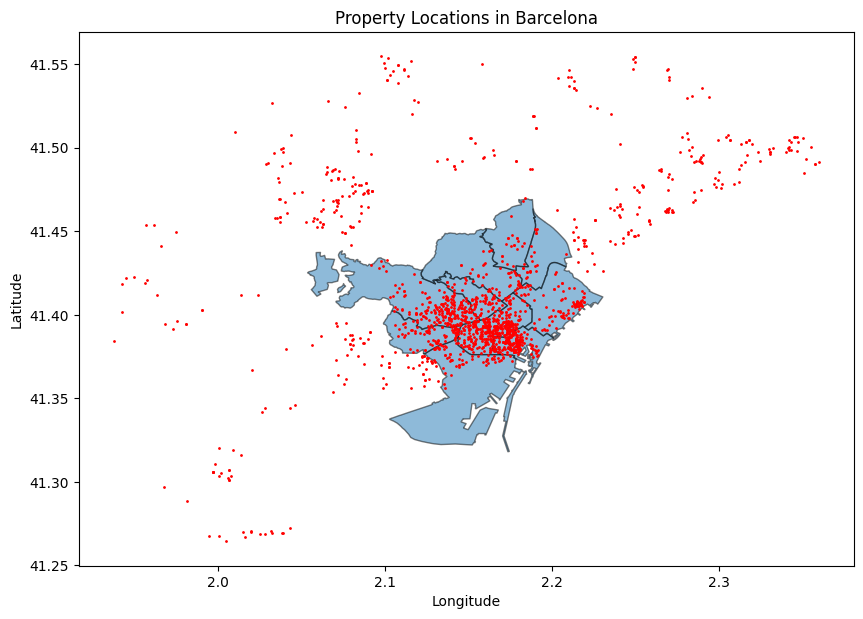

In [53]:
gdf_locs = gpd.GeoDataFrame(df_barca_clean, geometry=gpd.points_from_xy(df_barca_clean.longitude, df_barca_clean.latitude))
gdf_geometry = gdf_locs['geometry']
gdf_geometry.crs = CRS.from_epsg(25830)
gdf_city_properties = gdf_geometry.to_frame()
barca_map.crs = CRS.from_epsg(25830)
    # Transform to EPSG 25830
city_map = barca_map.to_crs(epsg=25830)
fig4, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_city_properties.plot(ax=ax, color='red', markersize=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Barcelona')

fig4

